# Testing Snowplow Algorithm

In [1]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import dual_graphs
import pandas as pd
import construction
from shortest_paths import ShortestPaths
from crossover import apply_crossover
import osmnx as ox
from genetic import run_genetic
from solution import Solution
from costs import routes_cost
from params import *
import plotting
import local_search
from sectioning_streets import sectioning
%load_ext autoreload
%autoreload 2

Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [2]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [3]:
instance = "sectionedfullstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
        
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



In [4]:
print(G)
print(G_DUAL)

MultiDiGraph with 105 nodes and 503 edges
MultiDiGraph with 504 nodes and 2917 edges


In [5]:
sp = ShortestPaths(G_DUAL, True, True)

In [6]:
construction.process_node(G, 0, 1)

([(1,
   4,
   0,
   {'osmid': [23810769, 616727804],
    'oneway': True,
    'lanes': '1',
    'name': 'Deming Way',
    'highway': 'tertiary',
    'reversed': False,
    'length': 134.208,
    'speed_kph': 43.2,
    'travel_time': 11.2,
    'geometry': <LINESTRING (-89.524 43.097, -89.523 43.097, -89.523 43.097, -89.523 43.097,...>,
    'jurisdiction': 'City',
    'width': 40.0,
    'roadtype': 'Way',
    'maintainer': 'CITY OF MIDDLETON',
    'priority': 3.0,
    'passes_rem': 3.0,
    'salt_per': 3.0,
    'serviced': False,
    'deadheading_passes': 0}),
  (1,
   4,
   1,
   {'osmid': [23810769, 616727804],
    'oneway': True,
    'lanes': '1',
    'name': 'Deming Way',
    'highway': 'tertiary',
    'reversed': False,
    'length': 134.208,
    'speed_kph': 43.2,
    'travel_time': 11.2,
    'geometry': <LINESTRING (-89.524 43.097, -89.523 43.097, -89.523 43.097, -89.523 43.097,...>,
    'jurisdiction': 'City',
    'width': 40.0,
    'roadtype': 'Way',
    'maintainer': 'CITY OF M

In [7]:
r, rreq = construction.route_generation(G, sp)


In [8]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


0 --> 2. (2) Salt value: 100. Prev: None. Next: (2, 6, 0). Route end: False
2 --> 6. (0) Salt value: 97.0. Prev: (0, 2, 2). Next: (6, 58, 0). Route end: False
6 --> 58. (0) Salt value: 94.0. Prev: (2, 6, 0). Next: (58, 96, 0). Route end: False
58 --> 96. (0) Salt value: 91.0. Prev: (6, 58, 0). Next: (96, 95, 0). Route end: False
96 --> 95. (0) Salt value: 88.0. Prev: (58, 96, 0). Next: (95, 97, 0). Route end: False
95 --> 97. (0) Salt value: 85.0. Prev: (96, 95, 0). Next: (97, 17, 2). Route end: False
97 --> 17. (2) Salt value: 82.0. Prev: (95, 97, 0). Next: (17, 12, 0). Route end: False
17 --> 12. (0) Salt value: 79.0. Prev: (97, 17, 2). Next: (12, 16, 2). Route end: False
12 --> 16. (2) Salt value: 76.0. Prev: (17, 12, 0). Next: (16, 19, 0). Route end: False
16 --> 19. (0) Salt value: 73.0. Prev: (12, 16, 2). Next: (19, 23, 1). Route end: False
19 --> 23. (1) Salt value: 70.0. Prev: (16, 19, 0). Next: (23, 19, 0). Route end: False
23 --> 19. (0) Salt value: 67.0. Prev: (19, 23, 1). N

In [9]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

0 --> 2. (2) Salt value: 100. Prev: None. Next: (2, 6, 0). Route end: False
2 --> 6. (0) Salt value: 97.0. Prev: (0, 2, 2). Next: (6, 58, 0). Route end: False
6 --> 58. (0) Salt value: 94.0. Prev: (2, 6, 0). Next: (58, 96, 0). Route end: False
58 --> 96. (0) Salt value: 91.0. Prev: (6, 58, 0). Next: (96, 95, 0). Route end: False
96 --> 95. (0) Salt value: 88.0. Prev: (58, 96, 0). Next: (95, 97, 0). Route end: False
95 --> 97. (0) Salt value: 85.0. Prev: (96, 95, 0). Next: (97, 17, 2). Route end: False
97 --> 17. (2) Salt value: 82.0. Prev: (95, 97, 0). Next: (17, 12, 0). Route end: False
17 --> 12. (0) Salt value: 79.0. Prev: (97, 17, 2). Next: (12, 16, 2). Route end: False
12 --> 16. (2) Salt value: 76.0. Prev: (17, 12, 0). Next: (16, 19, 0). Route end: False
16 --> 19. (0) Salt value: 73.0. Prev: (12, 16, 2). Next: (19, 23, 1). Route end: False
19 --> 23. (1) Salt value: 70.0. Prev: (16, 19, 0). Next: (23, 19, 0). Route end: False
23 --> 19. (0) Salt value: 67.0. Prev: (19, 23, 1). N

Test Local Search

In [10]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq), 0)

print(routes_cost(G, sp, S_first.routes))
for route in S_first.routes:
    for routestep in route:
        print(routestep)
    print("**")

1974086.1599999997
0 --> 2. (2) Salt value: 100. Prev: None. Next: (2, 6, 0). Route end: False
2 --> 6. (0) Salt value: 97.0. Prev: (0, 2, 2). Next: (6, 58, 0). Route end: False
6 --> 58. (0) Salt value: 94.0. Prev: (2, 6, 0). Next: (58, 96, 0). Route end: False
58 --> 96. (0) Salt value: 91.0. Prev: (6, 58, 0). Next: (96, 95, 0). Route end: False
96 --> 95. (0) Salt value: 88.0. Prev: (58, 96, 0). Next: (95, 97, 0). Route end: False
95 --> 97. (0) Salt value: 85.0. Prev: (96, 95, 0). Next: (97, 17, 2). Route end: False
97 --> 17. (2) Salt value: 82.0. Prev: (95, 97, 0). Next: (17, 12, 0). Route end: False
17 --> 12. (0) Salt value: 79.0. Prev: (97, 17, 2). Next: (12, 16, 2). Route end: False
12 --> 16. (2) Salt value: 76.0. Prev: (17, 12, 0). Next: (16, 19, 0). Route end: False
16 --> 19. (0) Salt value: 73.0. Prev: (12, 16, 2). Next: (19, 23, 1). Route end: False
19 --> 23. (1) Salt value: 70.0. Prev: (16, 19, 0). Next: (23, 19, 0). Route end: False
23 --> 19. (0) Salt value: 67.0. P

In [11]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, K, threshold=1)
print(routes_cost(G, sp, S_new.routes))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

2039120.7200000002
6 --> 58. (0) Salt value: 94.0. Prev: None. Next: (58, 96, 1). Route end: False
58 --> 96. (1) Salt value: 91.0. Prev: (6, 58, 0). Next: (58, 96, 2). Route end: False
58 --> 96. (2) Salt value: 21.0. Prev: (58, 96, 1). Next: (58, 96, 0). Route end: False
58 --> 96. (0) Salt value: 91.0. Prev: (58, 96, 2). Next: (96, 95, 0). Route end: False
96 --> 95. (0) Salt value: 88.0. Prev: (58, 96, 0). Next: (97, 22, 2). Route end: False
97 --> 22. (2) Salt value: 85.0. Prev: (96, 95, 0). Next: (22, 92, 0). Route end: False
22 --> 92. (0) Salt value: 46.0. Prev: (97, 22, 2). Next: (95, 97, 1). Route end: False
95 --> 97. (1) Salt value: 85.0. Prev: (22, 92, 0). Next: (97, 17, 2). Route end: False
97 --> 17. (2) Salt value: 82.0. Prev: (95, 97, 1). Next: (17, 12, 0). Route end: False
17 --> 12. (0) Salt value: 79.0. Prev: (97, 17, 2). Next: (12, 16, 2). Route end: False
12 --> 16. (2) Salt value: 76.0. Prev: (17, 12, 0). Next: (16, 21, 2). Route end: False
16 --> 21. (2) Salt va

In [12]:
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

6 --> 58. (0) Salt value: 94.0. Prev: None. Next: (58, 96, 1). Route end: False
58 --> 96. (1) Salt value: 91.0. Prev: (6, 58, 0). Next: (58, 96, 2). Route end: False
58 --> 96. (2) Salt value: 21.0. Prev: (58, 96, 1). Next: (58, 96, 0). Route end: False
58 --> 96. (0) Salt value: 91.0. Prev: (58, 96, 2). Next: (96, 95, 0). Route end: False
96 --> 95. (0) Salt value: 88.0. Prev: (58, 96, 0). Next: (97, 22, 2). Route end: False
97 --> 22. (2) Salt value: 85.0. Prev: (96, 95, 0). Next: (22, 92, 0). Route end: False
22 --> 92. (0) Salt value: 46.0. Prev: (97, 22, 2). Next: (95, 97, 1). Route end: False
95 --> 97. (1) Salt value: 85.0. Prev: (22, 92, 0). Next: (97, 17, 2). Route end: False
97 --> 17. (2) Salt value: 82.0. Prev: (95, 97, 1). Next: (17, 12, 0). Route end: False
17 --> 12. (0) Salt value: 79.0. Prev: (97, 17, 2). Next: (12, 16, 2). Route end: False
12 --> 16. (2) Salt value: 76.0. Prev: (17, 12, 0). Next: (16, 21, 2). Route end: False
16 --> 21. (2) Salt value: 61.0. Prev: (1

In [13]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")



initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
80 --> 79. (1) Salt value: 0. Prev: None. Next: (79, 37, 2). Route end: False
79 --> 37. (2) Salt value: 51.0. Prev: (80, 79, 1). Next: (80, 79, 2). Route end: False
80 --> 79. (2) Salt value: 54.0. Prev: (79, 37, 2). Next: (79, 37, 0). Route end: False
79 --> 37. (0) Salt value: 0. Prev: (80, 79, 2). Next: (80, 79, 0). Route end: False
80 --> 79. (0) Salt value: 43.0. Prev: (79, 37, 0). Next: (37, 85, 0). Route end: False
37 --> 85. (0) Salt value: 71.0. Prev: (80, 79, 

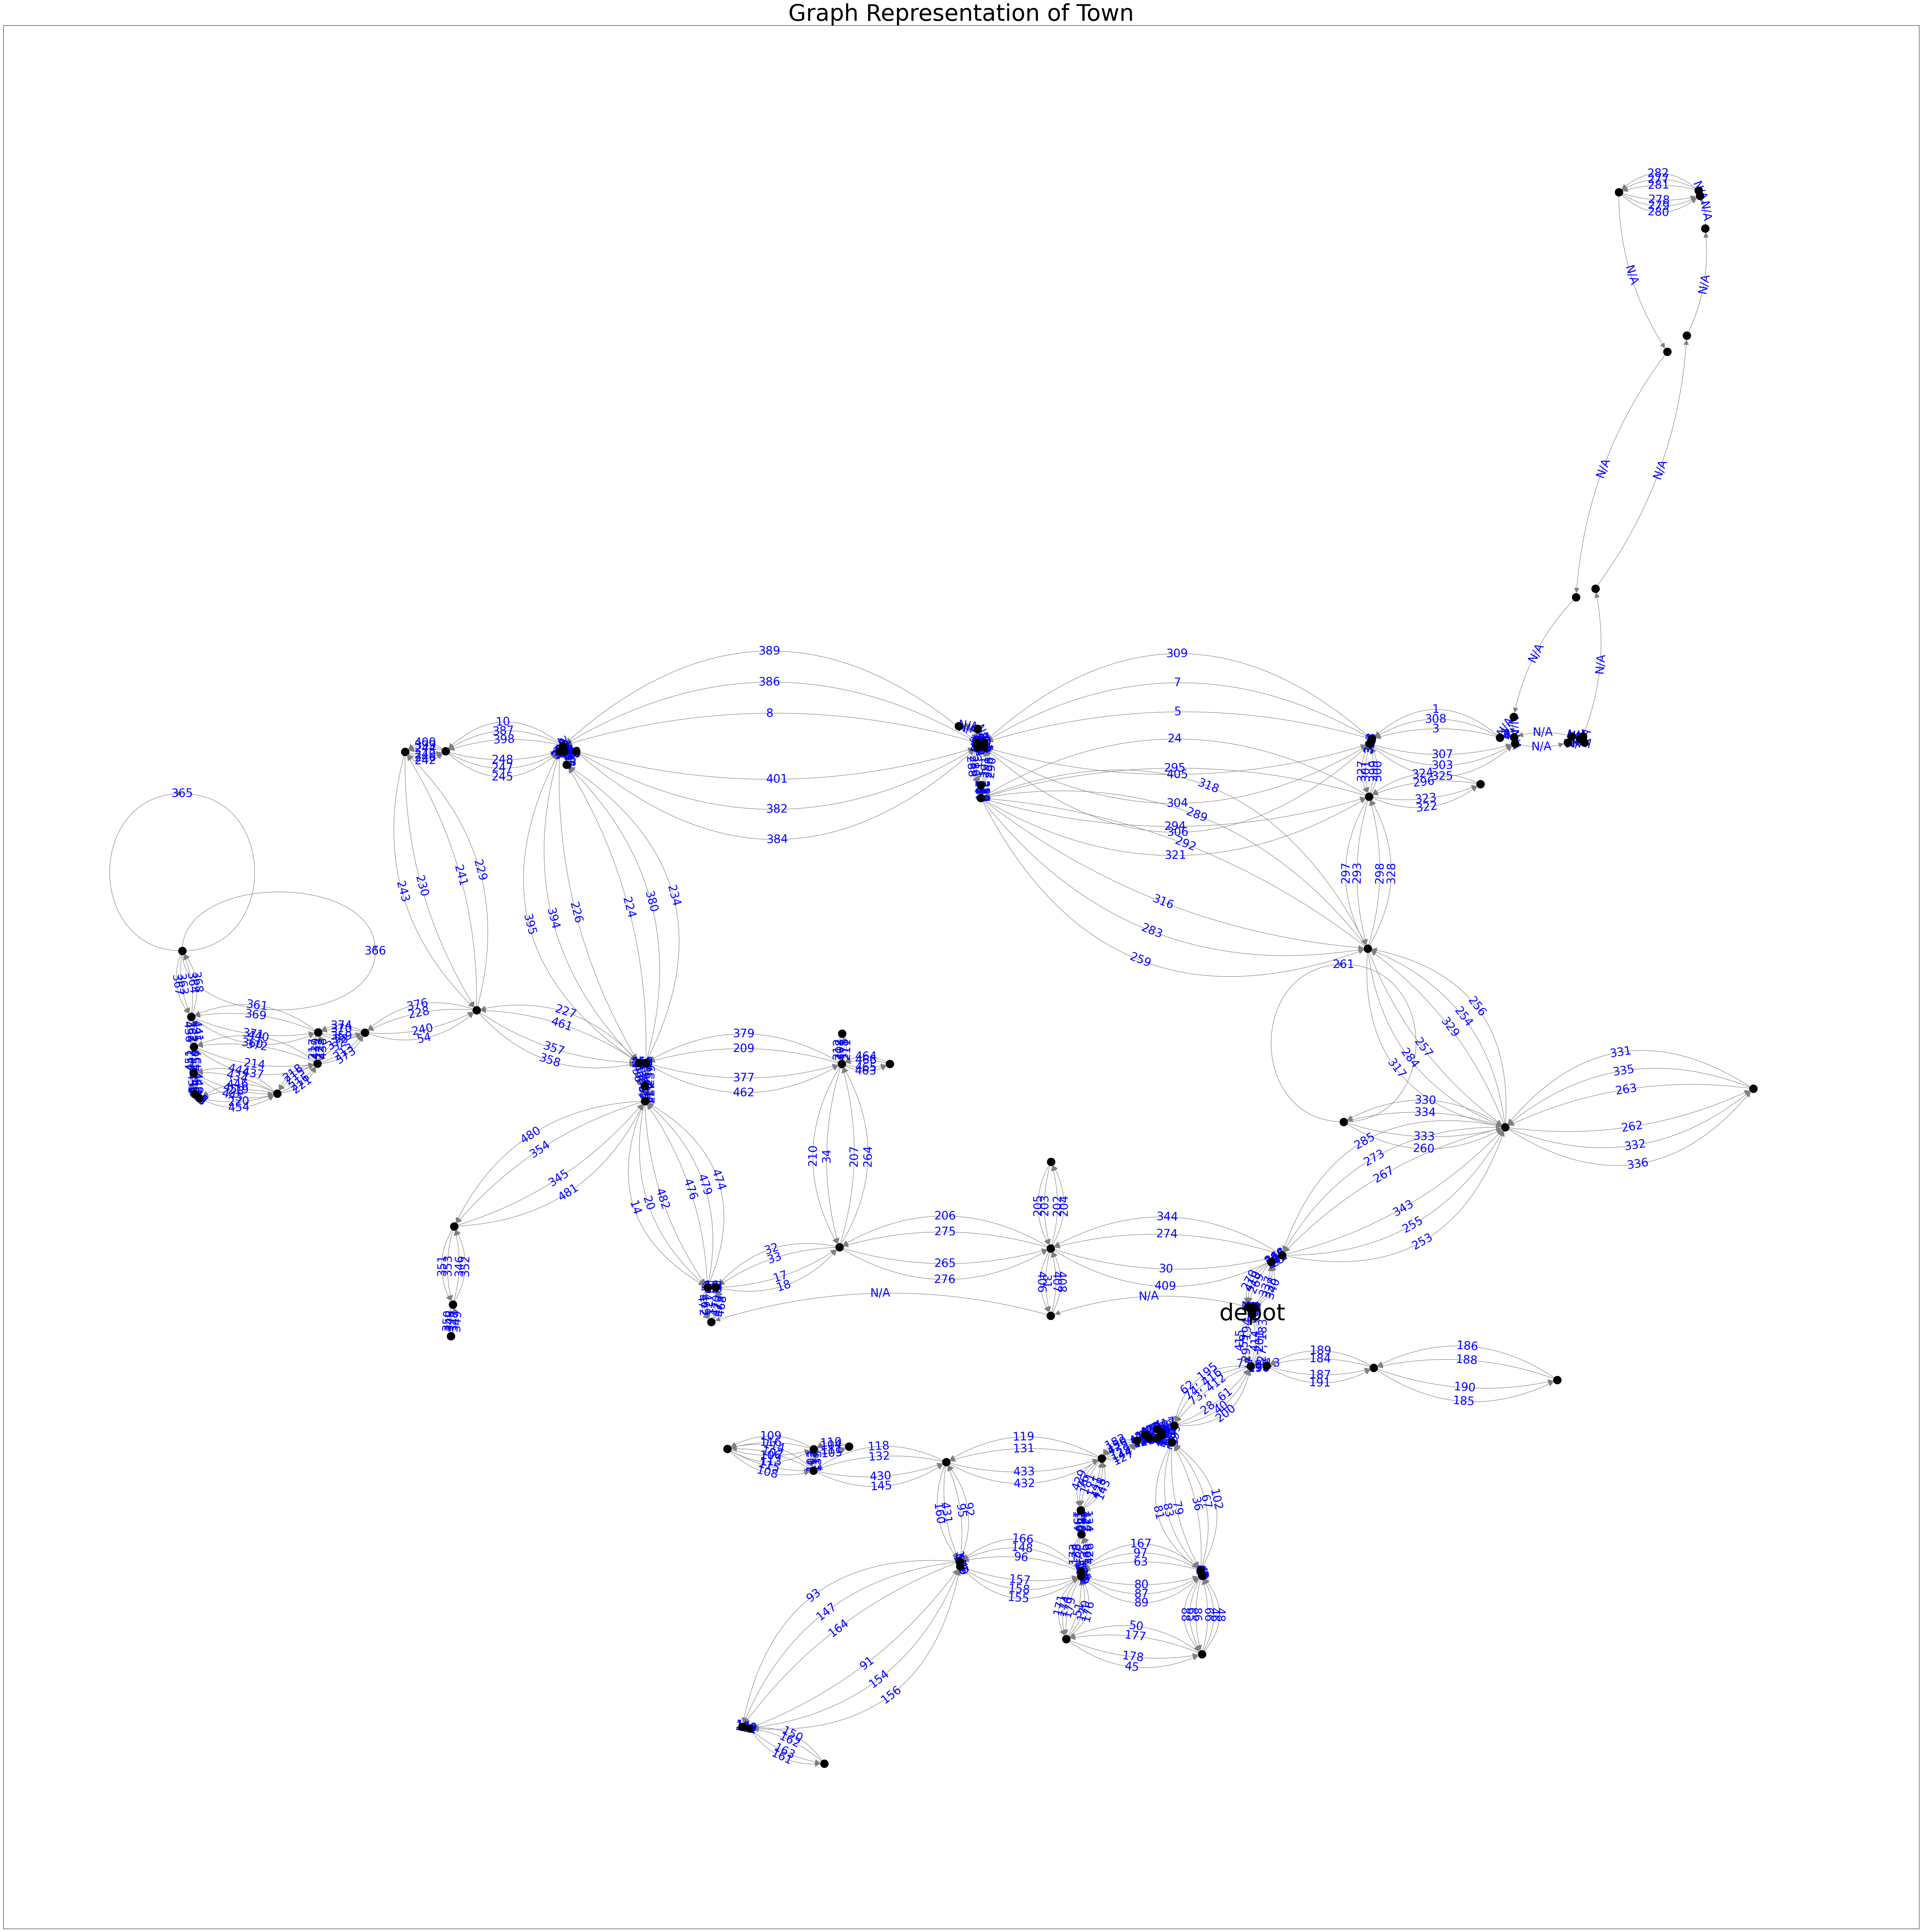

DONE
Routes cost 1656445.3999999994


In [14]:

# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75))

print("DONE")
print("Routes cost", sol.cost)

## Plot the routes using OSMNX

In [15]:
plotting_routes = [sol.routes[0][0].node1]
for i in range(len(sol.routes)):
    for j in range(len(sol.routes[i])):
        step = sol.routes[i][j]
        nextstep = sol.routes[i][j+1] if j < len(sol.routes[i])-1 else (sol.routes[i][0] if i < len(sol.routes)-1 else None)

        if nextstep == None:
            break

        path = sp.get_shortest_path(step.get_edge(), nextstep.get_edge())
        for node in path[1:]:
            plotting_routes.append(node)
node_plotting_route = [plotting_routes[0]]
for edge in plotting_routes[1:]:
    node_plotting_route.append(edge[0])
node_plotting_route.append(plotting_routes[-1][1])


In [16]:
count = 0
for u, v in zip(node_plotting_route[:-1], node_plotting_route[1:]):
    # if G.get_edge_data(u, v) == None:
    #     print("none", count)
    # count += 1
    # if "length" not in G.get_edge_data(u, v):
    #     print(G.get_edge_data(u, v))
    # print(G.get_edge_data(u, v))
    # data = min(G.get_edge_data(u, v).values(), key=lambda d: d["length"])


SyntaxError: incomplete input (3348346766.py, line 9)

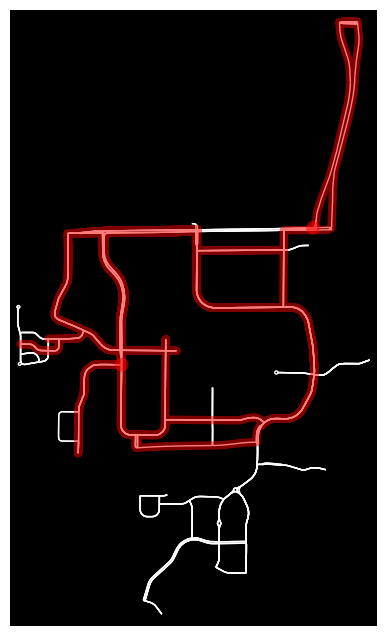

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph_route(G, node_plotting_route[:250], route_linewidth=6, node_size=0, bgcolor='k', edge_color='w')